In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np
plt.style.use("seaborn-white")

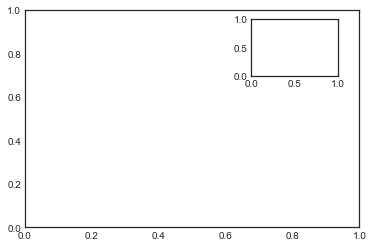

In [17]:
# plt.axes: 직접 만든 서브플롯
# plt.axes -> 그림을 채우는 표준 축 객체 생성, [아래, 왼쪽, 너비, 높이]

ax1 = plt.axes() # 표준 축
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

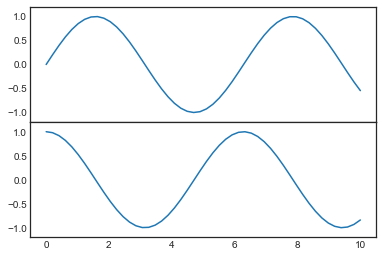

In [18]:
# 객체지향 인터페이스 -> fig.add_axes()
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x));

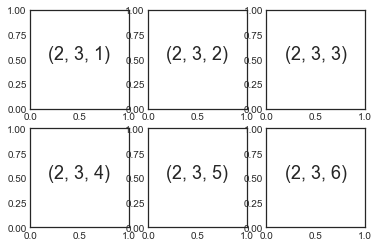

In [19]:
# plt.subplot: 간단한 서브플롯의 그리드
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha="center")

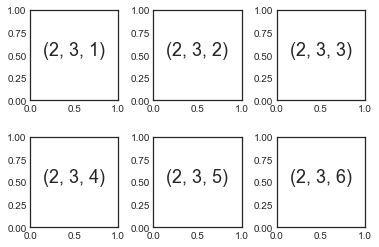

In [21]:
# plt.subplots_adjust -> 서브플롯 사이 간격 추가
# fig.add_subplot() -> 객체지향 명령어
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha="center")

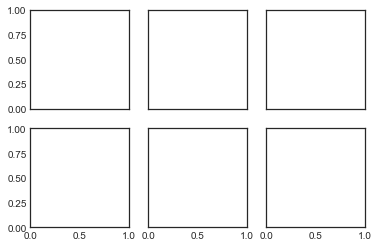

In [25]:
# plt.subplots: 한 번에 전체 그리드 만들기
fig, ax = plt.subplots(nrows=2, ncols=3, sharex="col", sharey="row") # 모든 x축, y축 척도 공유

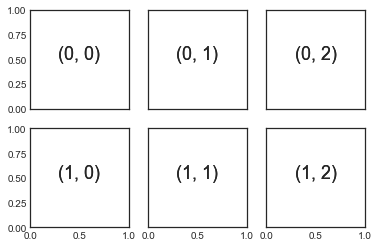

In [27]:
# 축이 2차원 배열 안에 있어 [행, 열]로 인덱싱 가능
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5, 0.5, str((i, j)),
                     fontsize=18, ha="center")

# plt.subplots() -> index from 0
fig

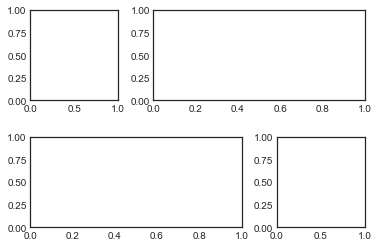

In [31]:
# plt.GridSpec: 복잡한 배치
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.4)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

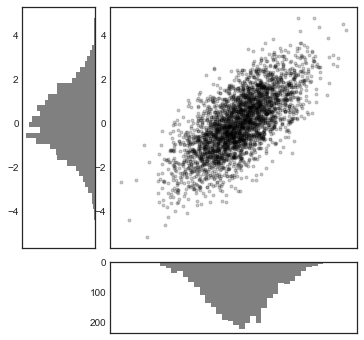

In [67]:
# 정규 분포 데이터 만들기
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# gridspec으로 축 설정하기
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2) # divide 6x6 figure into 16 equal sections
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], xticklabels=[], sharex=main_ax)

# 메인 축에 점 산포하기
main_ax.plot(x, y, "ok", markersize=3, alpha=0.2)

# 보조 축상에 히스토그램 만들기
x_hist.hist(x, bins=40, histtype="stepfilled",
            orientation="vertical", color="gray")
x_hist.invert_yaxis()

y_hist.hist(y, bins=40, histtype="stepfilled",
            orientation="horizontal", color="gray")
y_hist.invert_xaxis()